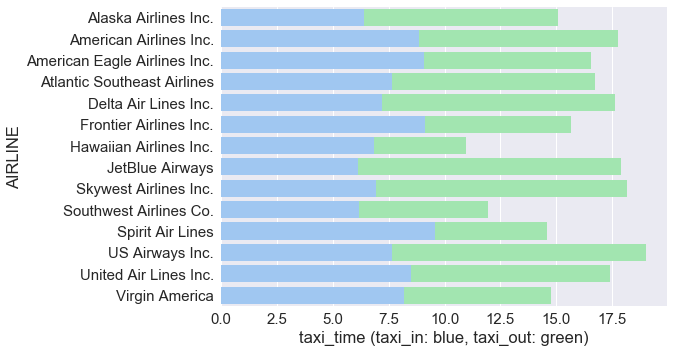

In [5]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

airlines = pd.read_csv('./input/airlines.csv')
airports= pd.read_csv('./input/airports.csv')
flights = pd.read_csv('./input/flights.csv', low_memory=False)
flights_v1 = pd.merge(flights, airlines, left_on='AIRLINE', right_on='IATA_CODE', how='left')
flights_v1.drop('IATA_CODE', axis=1, inplace=True)
flights_v1.rename(columns={'AIRLINE_x': 'AIRLINE_CODE','AIRLINE_y': 'AIRLINE'}, inplace=True)

airline_rank_v04 = pd.DataFrame({'taxi_out_time' : flights_v1.groupby(['AIRLINE'])
                                 ['TAXI_OUT'].mean()}).reset_index()
airline_rank_v05 = pd.DataFrame({'taxi_in_time' : flights_v1.groupby(['AIRLINE'])
                                 ['TAXI_IN'].mean()}).reset_index()
ax = plt.subplots()
sns.set_color_codes("pastel")
sns.set_context("notebook", font_scale=1.5)
ax = sns.barplot(x="taxi_out_time", y="AIRLINE", data=airline_rank_v04, color="g")
ax = sns.barplot(x="taxi_in_time", y="AIRLINE", data=airline_rank_v05, color="b")
ax.set(xlabel="taxi_time (taxi_in: blue, taxi_out: green)")
plt.show()
